In [ ]:
# import statements
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

Mounted at /content/drive


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# plt.imshow(x_test[0], cmap='gray')
# plt.show()
# y_test[0]
x_train_resized = np.zeros((x_train.shape[0], 32, 32, 3), dtype=np.float32)
for i in range(x_train.shape[0]):
    img = np.expand_dims(x_train[i], axis=-1)
    img = array_to_img(img, scale=False).resize((32, 32))
    x_train_resized[i] = img_to_array(img)

x_test_resized = np.zeros((x_test.shape[0], 32, 32, 3), dtype=np.float32)
for i in range(x_test.shape[0]):
    img = np.expand_dims(x_test[i], axis=-1)
    img = array_to_img(img, scale=False).resize((32, 32))
    x_test_resized[i] = img_to_array(img)

# Convert the images to float32 and scale the pixel values to [0, 1]
x_train_preprocessed = x_train_resized.astype(np.float32) / 255.0
x_test_preprocessed = x_test_resized.astype(np.float32) / 255.0

# Convert the labels to int32
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Load the Vgg16 model with pre-trained weights
model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# model.summary()
# Freeze the pre-trained layers to prevent them from being trained again
for layer in model.layers:
    layer.trainable = False
# Add custom classification layers on top of the pre-trained model
x =model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Compile the model
model = keras.Model(inputs=model.input, outputs=predictions)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_preprocessed, y_train, epochs=99,batch_size=32, validation_data=(x_test_preprocessed, y_test))
model.save('/content/drive/MyDrive/Mnist Digit Recogination/model(VGG16).hdf5')
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_preprocessed, y_test)
print('Test accuracy:', test_acc)

Epoch 1/99
1875/1875 [==============================] - 28s 10ms/step - loss: 0.2425 - accuracy: 0.9204 - val_loss: 0.1386 - val_accuracy: 0.9563
Epoch 2/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1346 - accuracy: 0.9561 - val_loss: 0.1398 - val_accuracy: 0.9533
Epoch 3/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1123 - accuracy: 0.9644 - val_loss: 0.1035 - val_accuracy: 0.9668
Epoch 4/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0989 - accuracy: 0.9672 - val_loss: 0.1144 - val_accuracy: 0.9627
Epoch 5/99
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0896 - accuracy: 0.9707 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 6/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0836 - accuracy: 0.9724 - val_loss: 0.0966 - val_accuracy: 0.9692
Epoch 7/99
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0732 - accuracy: 0.9758 - val_loss: 0.0813 -

313/313 [==============================] - 2s 7ms/step
Predicted: 7
Actual: 7

Predicted: 2
Actual: 2

Predicted: 1
Actual: 1

Predicted: 0
Actual: 0

Predicted: 4
Actual: 4

Predicted: 1
Actual: 1

Predicted: 4
Actual: 4

Predicted: 9
Actual: 9

Predicted: 5
Actual: 5

Predicted: 9
Actual: 9

Predicted: 2
Actual: 2



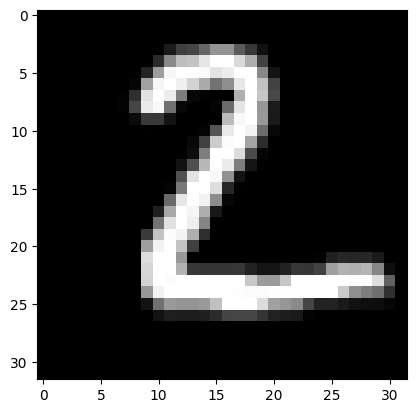

In [ ]:
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/Mnist Digit Recogination/model(VGG16).hdf5')

# Make predictions on the test data
predictions = model.predict(x_test_preprocessed)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Print some example predictions
for i in range(10):
    plt.imshow(x_test_preprocessed[i])
    print("Predicted:", predicted_labels[i])
    print("Actual:", y_test[i])


313/313 [==============================] - 3s 9ms/step


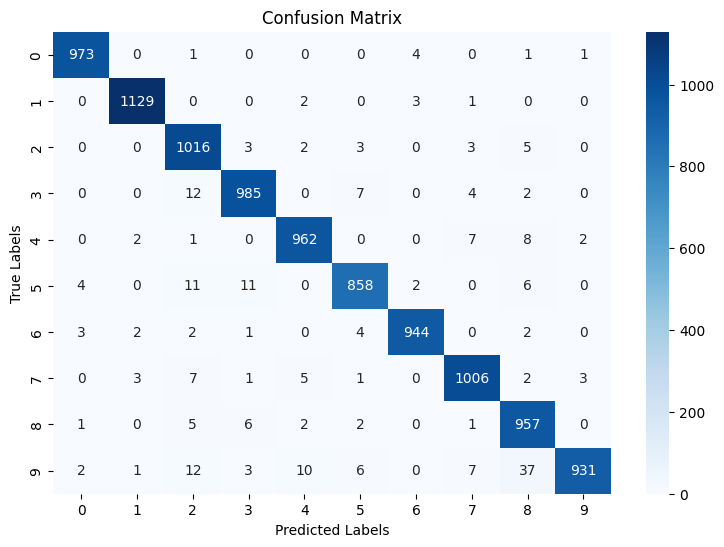

In [ ]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model
import seaborn as sns
# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Mnist Digit Recogination/model(VGG16).hdf5')  # Adjust the filename and path accordingly




# Generate predictions
y_pred = model.predict(x_test_preprocessed)
y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming the predictions are in one-hot encoded form

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix using seaborn
fig=plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
fig.savefig('/content/drive/MyDrive/vgg16(ph).png')
